In [45]:
from bokeh.io import output_notebook, show
output_notebook()
import seaborn as sns
import matplotlib.dates as mdates

Loading BokehJS ...

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from pandas import DataFrame
from pandas_datareader import data
from bokeh.plotting import figure, output_file, show
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral4
from bokeh.models import ColumnDataSource
from bokeh.models import LinearAxis, Range1d
from bokeh.layouts import gridplot




class StockMarketAnalysis:
    def __init__(self,stock,units,startD,endD,period):
        self.stock = stock
        self.startD = startD
        self.endD = endD
        self.period = period
        self.units = units


    def CalculateInvestment(self):
        msft = yf.Ticker(self.stock)
        if self.period=="max":
            msft_h = msft.history(period="max")
        else:
            msft_h = msft.history(start=self.startD, end=self.endD)
        
        msft_h1 = msft_h[(msft_h['Stock Splits']>0.0) | (msft_h['Dividends']>0.0) ]
        msft_h1['Stock Splits'].mask(msft_h1['Stock Splits'] == 0.0,1.0,inplace=True)
        
   		# if Dividends are there or not     
        # if msft_h1==0.0:
        #     print("This company do not provide dividends")

        msft_h2 = msft_h1[['Close']]
        msft_h2_ch = msft_h2.pct_change()

        Inv_1 = self.units*msft_h1.Close[0]
        Inv_3 = []
        for ii in range(1,msft_h1.Dividends.shape[0]):

        	if(msft_h1['Stock Splits'][ii] > 0.0):
        		self.units = msft_h1['Stock Splits'][ii]*self.units
        		Inv_1 = self.units*msft_h1.Close[ii]
        	else:
        		self.units = self.units
	
        	Inv_2 = (Inv_1 + (Inv_1*msft_h2_ch.Close[ii]))

        	if(msft_h1['Dividends'][ii] > 0.0):
        		Inv_1 = Inv_2 + Inv_2*msft_h1.Dividends[ii]/100
        	else:
        		Inv_1 = Inv_2

        	Inv_3.append(Inv_1)
        
        Inv_3.insert(0, msft_h1.Close[0])
        msft_h1["Total Returns"] = Inv_3
        print("Total Stocks: ",self.units)


# output to static HTML file
        output_file("lines.html")
        output_file("stocks.html", title="stocks.py example")

        ds = ColumnDataSource(msft_h1)
        TOOLTIPS = "box_select,lasso_select,help"
    # create a new plot with a datetime axis type
        p = figure(plot_width=800, plot_height=350,tools=TOOLTIPS,\
                   x_axis_type="datetime")

        p.add_tools(HoverTool(
            tooltips=[
                ( 'date',   '@Date{%F}'            ),
                ( 'Total Returns',  '$@{Total Returns}{%0.2f}' ), # use @{ } for field names with spaces
                ( 'dividends',  '@{Dividends}{%0.2f}' ),
            ],

            formatters={
                '@Date'    : 'datetime', # use 'datetime' formatter for '@date' field
                '@{Total Returns}' : 'printf',   # use 'printf' formatter for '@{adj close}' field
                                        # use default 'numeral' formatter for other fields
                '@{Dividends}' : 'printf',
            },

            # display a tooltip whenever the cursor is vertically in line with a glyph
        #    mode='vline'
        ))
        p.background_fill_color="#f5f5f5"
        p.grid.grid_line_color="white"
        p.xaxis.axis_label = 'Date'
        p.yaxis.axis_label = 'Price'
        p.axis.axis_line_color = None

        p.extra_y_ranges =  {"Dividends": Range1d(start=0, end=msft_h1.Dividends.max())}
        p.line(y='Total Returns',x='Date',source=ds,color='navy')
        p.line(y='Dividends',x='Date',source=ds,color='green',y_range_name="Dividends")
        p.add_layout(LinearAxis(y_range_name="Dividends", axis_label="Dividends"), 'right')
        p = gridplot([[p]])
        # show the results
        show(p)

In [12]:
msft = yf.Ticker("AAPL")
msft_h1 = msft_h[(msft_h['Stock Splits']>0.0) | (msft_h['Dividends']>0.0) ]
msft_h1.index

DatetimeIndex(['2010-03-25', '2010-06-24', '2010-09-24', '2010-12-22',
               '2011-03-25', '2011-06-24', '2011-09-23', '2011-12-21',
               '2012-03-26', '2012-06-25', '2012-09-24', '2012-12-20',
               '2013-03-22', '2013-06-24', '2013-09-23', '2013-12-20',
               '2014-03-25', '2014-06-24', '2014-09-24', '2014-12-22',
               '2015-03-25', '2015-06-26', '2015-09-25', '2015-12-21',
               '2016-03-15', '2016-06-14', '2016-09-13', '2016-12-20',
               '2017-03-24', '2017-06-21', '2017-09-22', '2017-12-21',
               '2018-03-22', '2018-06-22', '2018-09-28', '2018-12-24',
               '2019-03-25', '2019-06-17', '2019-09-16', '2019-12-24',
               '2020-03-26', '2020-06-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [3]:
spy = StockMarketAnalysis(stock="AAPL",units=10,startD="2010-01-10",endD="2020-09-11",period="NULL")

In [4]:
spy.CalculateInvestment()

Total Stocks:  280.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:8993: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from pandas import DataFrame
from pandas_datareader import data
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import pandas_bokeh

wordList = ["VOO", "AAPL", "MSFT", "SPY", "SWPPX", "VTI"]
stocks_list = []

for ii in wordList:
    msft = yf.Ticker(ii)
    msft_h = msft.history(start="2010-01-10",end="2020-09-11")
    msft_h1 = msft_h[(msft_h['Stock Splits']>0.0) | (msft_h['Dividends']>0.0) ]
    print(msft_h1.shape)
#    msft_h1['Stocks Name']=ii
    stocks_list.append(msft_h1)
    
stocks_list = pd.concat(stocks_list)  

(41, 7)
(35, 7)
(43, 7)
(42, 7)
(11, 7)
(42, 7)


In [528]:
#stocks_list.plot_bokeh(kind='line',y=['Close','Open'],rangetool=True)
#msft_h2 = pd.MultiIndex.from_frame(msft_h1)
stocks_list.plot_bokeh(kind='line',y=['Close','Open'],rangetool=True)

Column(id='227059', ...)

In [180]:
from bokeh.plotting import figure, output_file, show
from bokeh.models.tools import HoverTool

# output to static HTML file
output_file("lines.html")

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(msft_h1['Close'], window, 'same')

# output to static HTML file
output_file("stocks.html", title="stocks.py example")

# create a new plot with a datetime axis type
p = figure(plot_width=600, plot_height=350, x_axis_type="datetime")

# add renderers
p.circle(np.array(msft_h1.Close.index, dtype=np.datetime64),  msft_h1['Close'], size=7, color='darkgrey', alpha=0.9, legend_label='close')
p.line(np.array(msft_h1.Close.index, dtype=np.datetime64), aapl_avg, color='navy', legend_label='avg')

# NEW: customize by setting attributes
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)


INFO:bokeh.io.state:Session output file 'lines.html' already exists, will be overwritten.
INFO:bokeh.io.state:Session output file 'stocks.html' already exists, will be overwritten.


In [223]:
from bokeh.plotting import figure, output_file, show
from bokeh.models.tools import HoverTool

# output to static HTML file
output_file("lines.html")
output_file("stocks.html", title="stocks.py example")
TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]


ds = ColumnDataSource(msft_h1)

# create a new plot with a datetime axis type
p = figure(plot_width=600, plot_height=350,tooltips=TOOLTIPS,x_axis_type="datetime")

# add renderers
#p.circle(np.array(aa.index, dtype=np.datetime64),  msft_h1['Close'], size=7, color='darkgrey', alpha=0.9, legend_label='close')
#p.line(np.array(aa.index, dtype=np.datetime64), aapl_avg, color='navy', legend_label='avg')
p.vline_stack(['Close','Open'],x='Date',source=ds,)


# show the results
show(p)



INFO:bokeh.io.state:Session output file 'lines.html' already exists, will be overwritten.
INFO:bokeh.io.state:Session output file 'stocks.html' already exists, will be overwritten.


In [7]:
msft_h['Day']=msft_h.index.day_name()

In [16]:
msft_h['Day']=msft_h.index.day_name()
msft2 = msft_h[(msft_h['Day']=="Monday")]
msft2F =  msft_h[(msft_h['Day']=="Friday")]
msft3 = msft2['Open'] - msft2['Close']
msft3F = msft2F['Open'] - msft2F['Close']
plt.plot(msft3)
plt.plot(msft3F)
ms = msft_h[['High', 'Low']]
ms.plot_bokeh(kind="line")

In [42]:
msft = yf.Ticker("AAPL")
opsd_daily = msft.history(period="max")
opsd_daily.index


DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24'],
              dtype='datetime64[ns]', name='Date', length=10031, freq=None)

In [43]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Weekday Name
Date,,,,,,,,,,
1999-08-25,0.47,0.47,0.46,0.47,295164800,0.0,0.0,1999,8,Wednesday
1991-06-20,0.30,0.31,0.30,0.31,144043200,0.0,0.0,1991,6,Thursday
1998-10-21,0.28,0.29,0.28,0.29,430617600,0.0,0.0,1998,10,Wednesday
2003-10-14,0.38,0.38,0.37,0.38,275419200,0.0,0.0,2003,10,Tuesday
1989-07-13,0.29,0.29,0.28,0.29,225433600,0.0,0.0,1989,7,Thursday


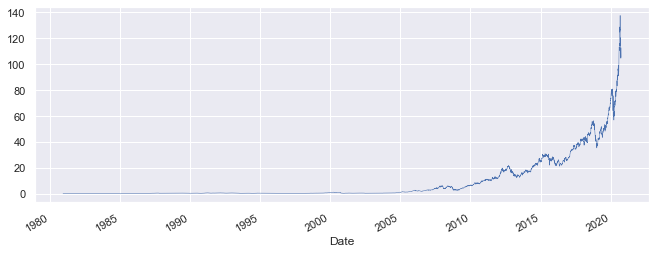

In [46]:
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Open'].plot(linewidth=0.5);

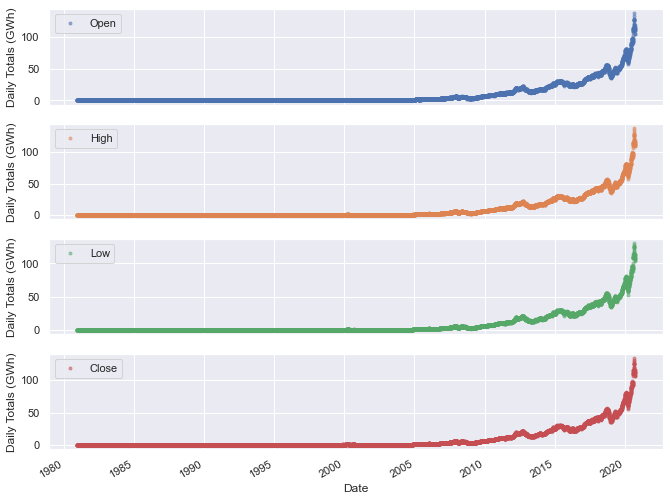

In [47]:
cols_plot = ['Open','High', 'Low', 'Close']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

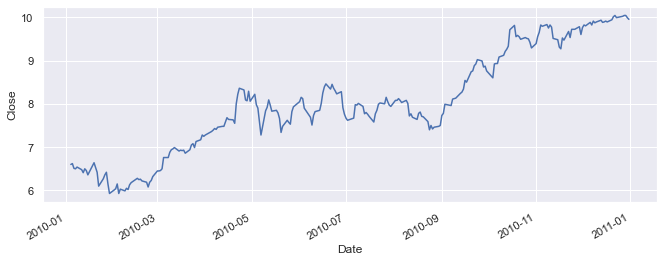

In [48]:
ax = opsd_daily.loc['2010', 'Close'].plot()
ax.set_ylabel('Close');

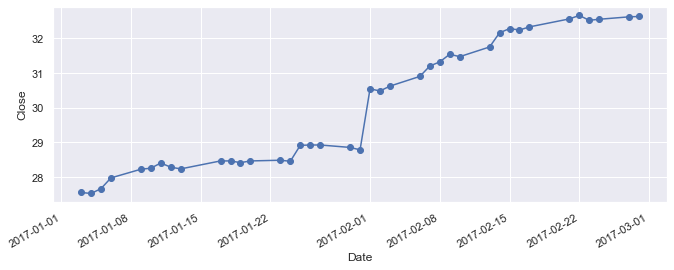

In [49]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Close'].plot(marker='o', linestyle='-')
ax.set_ylabel('Close');

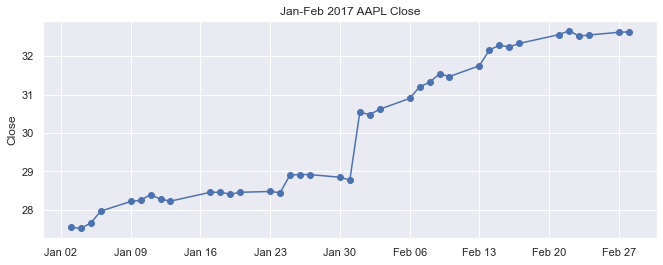

In [51]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Close')
ax.set_title('Jan-Feb 2017 AAPL Close')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

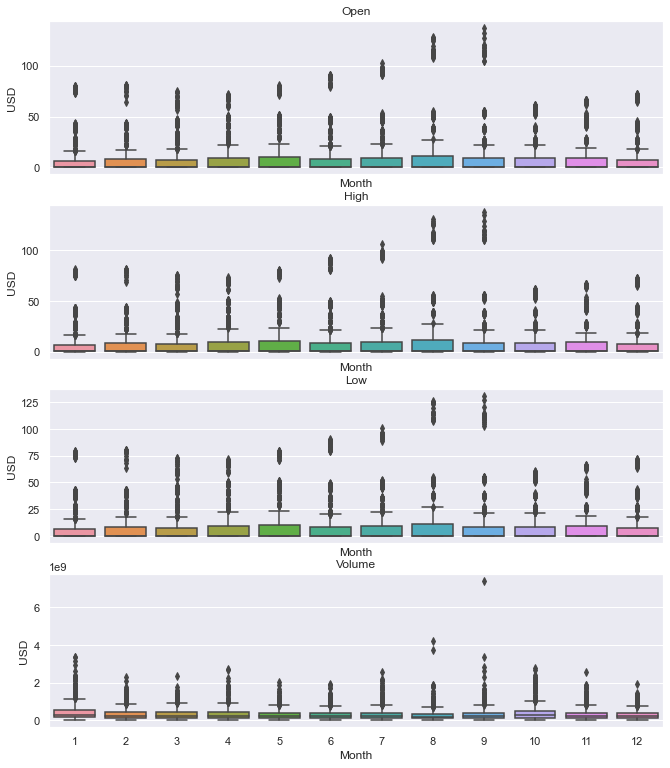

In [56]:
fig, axes = plt.subplots(4, 1, figsize=(11, 13), sharex=True)
for name, ax in zip(['Open','High', 'Low', 'Volume'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('USD')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

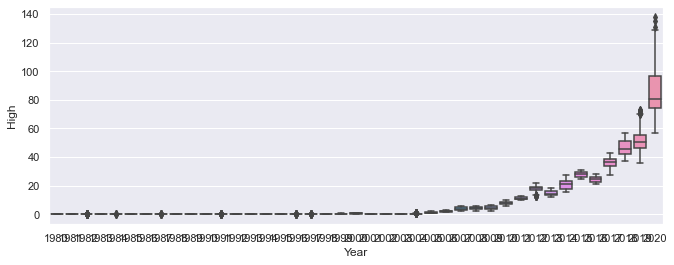

In [61]:
sns.boxplot(data=opsd_daily, x='Year', y='High');

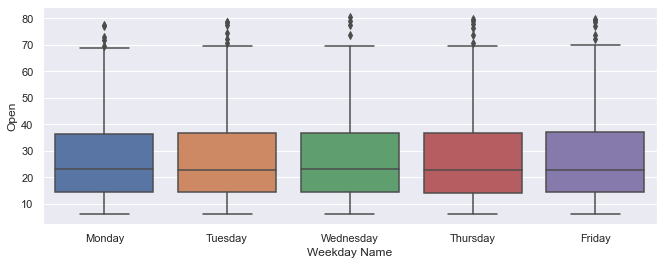

In [68]:
sns.boxplot(data=opsd_daily['2010-01':'2020-01'], x='Weekday Name', y='Open');

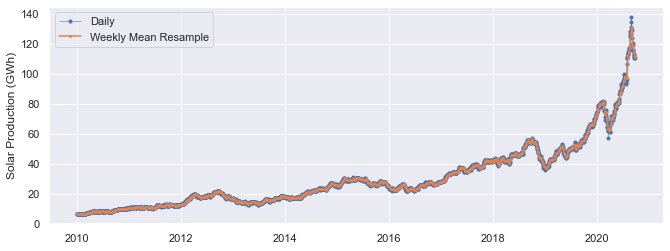

In [78]:
data_columns = ['Open', 'Close', 'High', 'Low']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()

start, end = '2010-01', '2020-09'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'High'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'High'],
marker='o', markersize=2, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

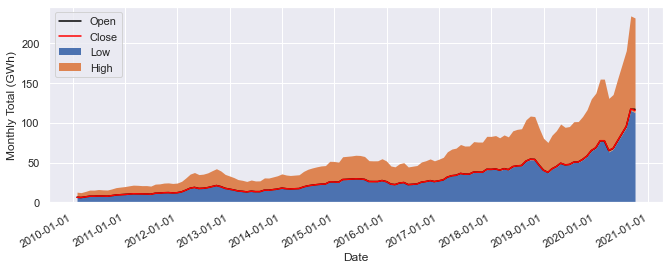

In [104]:
opsd_monthly = opsd_daily[data_columns].resample('M').mean()
opsd_monthly

fig, ax = plt.subplots()
ax.plot(opsd_monthly['Open']['2010-01':'2020-09'], color='black', label='Open')
ax.plot(opsd_monthly['Close']['2010-01':'2020-09'], color='Red', label='Close')
opsd_monthly[['Low', 'High']]['2010-01':'2020-09'].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

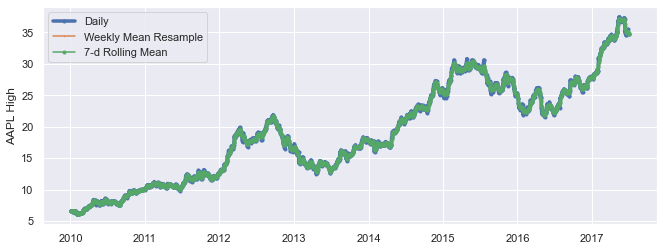

In [119]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)
start, end = '2010-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'High'],
marker='.', linestyle='-', linewidth=3.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'High'],
marker='.', markersize=1, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'High'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('AAPL High')
ax.legend();

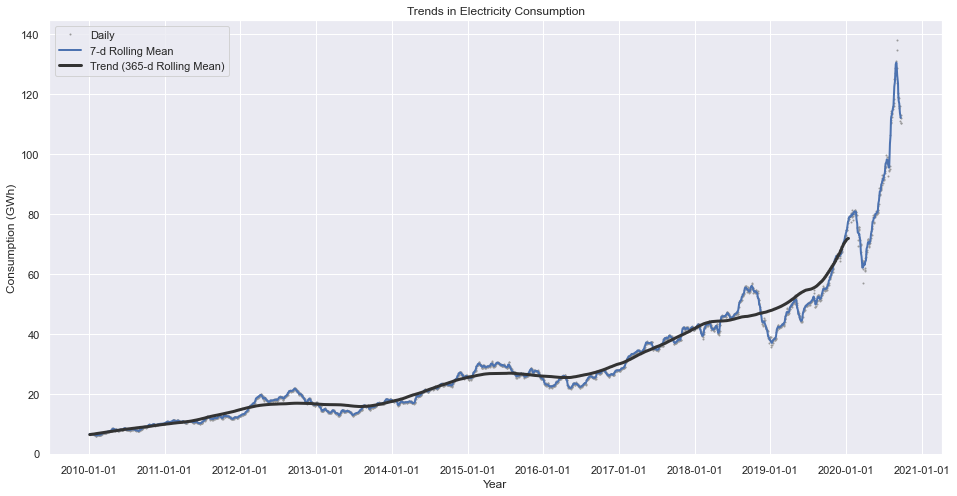

In [128]:
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(opsd_daily['High']['2010-01':'2020-09'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['High']['2010-01':'2020-09'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['High']['2010-01':'2020-09'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

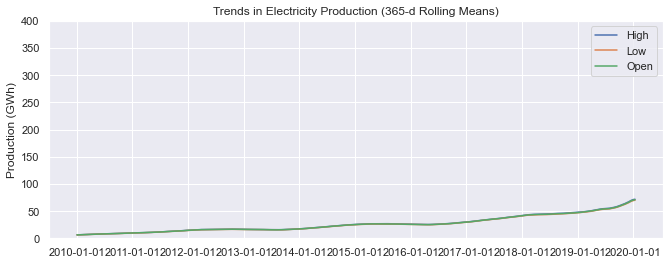

In [130]:
fig, ax = plt.subplots()
for nm in ['High', 'Low', 'Open']:
    ax.plot(opsd_365d[nm]['2010-01':'2020-09'], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');